In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('data/Книга1.csv')
data['Moscow Time'] = pd.to_datetime(data['Moscow Time'])
data.head()

,Unnamed: 0,Moscow Time,AmountRub
0,123,2021-03-01 06:00:01.565465444,13984.56
1,124,2021-03-01 10:00:01.565465444,13984.56
2,125,2021-03-01 10:10:01.765465444,-53983.00
3,126,2021-03-01 11:10:01.115465444,7777984.06
4,127,2021-03-01 11:20:41.111116544,10000004.00


In [4]:
def regroup_data (data, freq_per, agg_func):
    grouped_data = data.groupby(
        pd.Grouper(key='Moscow Time', freq=freq_per)
    )[['AmountRub']].agg(agg_func).reset_index()
    grouped_data.loc[:,'Minute']=grouped_data['Moscow Time'].dt.minute
    grouped_data.loc[:,'Hour']=grouped_data['Moscow Time'].dt.hour
    grouped_data.loc[:,'Date']=grouped_data['Moscow Time'].dt.date
    grouped_data.loc[:,'WeekDay']=grouped_data['Moscow Time'].dt.weekday
    grouped_data=grouped_data[grouped_data['Hour']>=10]
    grouped_data=grouped_data[grouped_data['Hour']<=17]
    grouped_data=grouped_data[grouped_data['WeekDay']<5]
    return grouped_data
grouped_data = regroup_data(data, '1 min', 'sum')
grouped_data.describe()

,AmountRub,Minute,Hour,WeekDay
count,1.801000e+03,1801.000000,1801.000000,1801.000000
mean,9.864497e+03,29.483620,13.301499,1.400888
std,2.984454e+05,17.332047,2.224271,1.083861
min,-5.398300e+04,0.000000,10.000000,0.000000
25%,0.000000e+00,14.000000,11.000000,0.000000
50%,0.000000e+00,29.000000,13.000000,1.000000
75%,0.000000e+00,44.000000,15.000000,2.000000
max,1.000000e+07,59.000000,17.000000,3.000000


<AxesSubplot:>

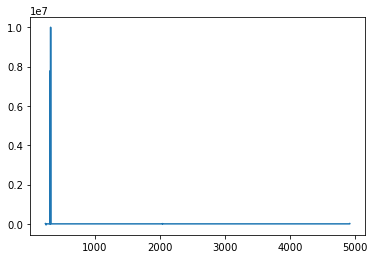

In [5]:
grouped_data.AmountRub.plot.line()